In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
users = pd.DataFrame(df[['CustomerId', 'Surname', 'Geography', 'Gender', 'Age', 'EstimatedSalary']])
users

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary
0,15634602,Hargrave,France,Female,42,101348.88
1,15647311,Hill,Spain,Female,41,112542.58
2,15619304,Onio,France,Female,42,113931.57
3,15701354,Boni,France,Female,39,93826.63
4,15737888,Mitchell,Spain,Female,43,79084.10
...,...,...,...,...,...,...
9995,15606229,Obijiaku,France,Male,39,96270.64
9996,15569892,Johnstone,France,Male,35,101699.77
9997,15584532,Liu,France,Female,36,42085.58
9998,15682355,Sabbatini,Germany,Male,42,92888.52


In [4]:
users.shape

(10000, 6)

## Создание признака

In [5]:
users['new_feature'] = 0
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,new_feature
0,15634602,Hargrave,France,Female,42,101348.88,0
1,15647311,Hill,Spain,Female,41,112542.58,0
2,15619304,Onio,France,Female,42,113931.57,0
3,15701354,Boni,France,Female,39,93826.63,0
4,15737888,Mitchell,Spain,Female,43,79084.10,0


In [6]:
users['Salary per month'] = (users.EstimatedSalary / 12).map('{:.2f}'.format)
users['Salary per month'] = users['Salary per month'].astype('float')
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,new_feature,Salary per month
0,15634602,Hargrave,France,Female,42,101348.88,0,8445.74
1,15647311,Hill,Spain,Female,41,112542.58,0,9378.55
2,15619304,Onio,France,Female,42,113931.57,0,9494.30
3,15701354,Boni,France,Female,39,93826.63,0,7818.89
4,15737888,Mitchell,Spain,Female,43,79084.10,0,6590.34


In [7]:
for _, row in users.iloc[:3].iterrows():
    print(row)
    print('_'*40)

CustomerId           15634602
Surname              Hargrave
Geography              France
Gender                 Female
Age                        42
EstimatedSalary     101348.88
new_feature                 0
Salary per month      8445.74
Name: 0, dtype: object
________________________________________
CustomerId           15647311
Surname                  Hill
Geography               Spain
Gender                 Female
Age                        41
EstimatedSalary     112542.58
new_feature                 0
Salary per month      9378.55
Name: 1, dtype: object
________________________________________
CustomerId           15619304
Surname                  Onio
Geography              France
Gender                 Female
Age                        42
EstimatedSalary     113931.57
new_feature                 0
Salary per month       9494.3
Name: 2, dtype: object
________________________________________


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   EstimatedSalary   10000 non-null  float64
 6   new_feature       10000 non-null  int64  
 7   Salary per month  10000 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 625.1+ KB


In [9]:
import time
from tqdm import tqdm
tqdm.pandas()

In [10]:
def salary2rub(x):
    return (x * 76.59)

users['Salary per month, Rub']= users['Salary per month'].progress_apply(salary2rub).map('{:.2f}'.format)
users

100%|██████████| 10000/10000 [00:00<00:00, 999691.10it/s]


,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,new_feature,Salary per month,"Salary per month, Rub"
0,15634602,Hargrave,France,Female,42,101348.88,0,8445.74,646859.23
1,15647311,Hill,Spain,Female,41,112542.58,0,9378.55,718303.14
2,15619304,Onio,France,Female,42,113931.57,0,9494.30,727168.44
3,15701354,Boni,France,Female,39,93826.63,0,7818.89,598848.79
4,15737888,Mitchell,Spain,Female,43,79084.10,0,6590.34,504754.14
...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,France,Male,39,96270.64,0,8022.55,614447.10
9996,15569892,Johnstone,France,Male,35,101699.77,0,8474.98,649098.72
9997,15584532,Liu,France,Female,36,42085.58,0,3507.13,268611.09
9998,15682355,Sabbatini,Germany,Male,42,92888.52,0,7740.71,592860.98


## Удаление признаков

In [11]:
users = users.drop(columns='new_feature')
users

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,Salary per month,"Salary per month, Rub"
0,15634602,Hargrave,France,Female,42,101348.88,8445.74,646859.23
1,15647311,Hill,Spain,Female,41,112542.58,9378.55,718303.14
2,15619304,Onio,France,Female,42,113931.57,9494.30,727168.44
3,15701354,Boni,France,Female,39,93826.63,7818.89,598848.79
4,15737888,Mitchell,Spain,Female,43,79084.10,6590.34,504754.14
...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,France,Male,39,96270.64,8022.55,614447.10
9996,15569892,Johnstone,France,Male,35,101699.77,8474.98,649098.72
9997,15584532,Liu,France,Female,36,42085.58,3507.13,268611.09
9998,15682355,Sabbatini,Germany,Male,42,92888.52,7740.71,592860.98


In [12]:
users['new_feature'] = 0
users

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,Salary per month,"Salary per month, Rub",new_feature
0,15634602,Hargrave,France,Female,42,101348.88,8445.74,646859.23,0
1,15647311,Hill,Spain,Female,41,112542.58,9378.55,718303.14,0
2,15619304,Onio,France,Female,42,113931.57,9494.30,727168.44,0
3,15701354,Boni,France,Female,39,93826.63,7818.89,598848.79,0
4,15737888,Mitchell,Spain,Female,43,79084.10,6590.34,504754.14,0
...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,France,Male,39,96270.64,8022.55,614447.10,0
9996,15569892,Johnstone,France,Male,35,101699.77,8474.98,649098.72,0
9997,15584532,Liu,France,Female,36,42085.58,3507.13,268611.09,0
9998,15682355,Sabbatini,Germany,Male,42,92888.52,7740.71,592860.98,0


In [13]:
users.drop(columns='new_feature', inplace=True)
users

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,Salary per month,"Salary per month, Rub"
0,15634602,Hargrave,France,Female,42,101348.88,8445.74,646859.23
1,15647311,Hill,Spain,Female,41,112542.58,9378.55,718303.14
2,15619304,Onio,France,Female,42,113931.57,9494.30,727168.44
3,15701354,Boni,France,Female,39,93826.63,7818.89,598848.79
4,15737888,Mitchell,Spain,Female,43,79084.10,6590.34,504754.14
...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,France,Male,39,96270.64,8022.55,614447.10
9996,15569892,Johnstone,France,Male,35,101699.77,8474.98,649098.72
9997,15584532,Liu,France,Female,36,42085.58,3507.13,268611.09
9998,15682355,Sabbatini,Germany,Male,42,92888.52,7740.71,592860.98


In [14]:
users.drop(columns=['Salary per month', 'Salary per month, Rub'], inplace=True)
users

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary
0,15634602,Hargrave,France,Female,42,101348.88
1,15647311,Hill,Spain,Female,41,112542.58
2,15619304,Onio,France,Female,42,113931.57
3,15701354,Boni,France,Female,39,93826.63
4,15737888,Mitchell,Spain,Female,43,79084.10
...,...,...,...,...,...,...
9995,15606229,Obijiaku,France,Male,39,96270.64
9996,15569892,Johnstone,France,Male,35,101699.77
9997,15584532,Liu,France,Female,36,42085.58
9998,15682355,Sabbatini,Germany,Male,42,92888.52


## Изменение признака

In [15]:
users['target'] = 0
users.loc[users['Geography'] == 'France', 'target'] = 1
users

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,Hargrave,France,Female,42,101348.88,1
1,15647311,Hill,Spain,Female,41,112542.58,0
2,15619304,Onio,France,Female,42,113931.57,1
3,15701354,Boni,France,Female,39,93826.63,1
4,15737888,Mitchell,Spain,Female,43,79084.10,0
...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,France,Male,39,96270.64,1
9996,15569892,Johnstone,France,Male,35,101699.77,1
9997,15584532,Liu,France,Female,36,42085.58,1
9998,15682355,Sabbatini,Germany,Male,42,92888.52,0


In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   EstimatedSalary  10000 non-null  float64
 6   target           10000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 547.0+ KB


In [17]:
users.Gender.replace({'Female': "f", 'Male': "m"})

0       f
1       f
2       f
3       f
4       f
       ..
9995    m
9996    m
9997    f
9998    m
9999    f
Name: Gender, Length: 10000, dtype: object

In [18]:
users

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,Hargrave,France,Female,42,101348.88,1
1,15647311,Hill,Spain,Female,41,112542.58,0
2,15619304,Onio,France,Female,42,113931.57,1
3,15701354,Boni,France,Female,39,93826.63,1
4,15737888,Mitchell,Spain,Female,43,79084.10,0
...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,France,Male,39,96270.64,1
9996,15569892,Johnstone,France,Male,35,101699.77,1
9997,15584532,Liu,France,Female,36,42085.58,1
9998,15682355,Sabbatini,Germany,Male,42,92888.52,0


In [19]:
users.Gender.replace({'Female': "f", 'Male': "m"}, inplace=True)
users

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,Hargrave,France,f,42,101348.88,1
1,15647311,Hill,Spain,f,41,112542.58,0
2,15619304,Onio,France,f,42,113931.57,1
3,15701354,Boni,France,f,39,93826.63,1
4,15737888,Mitchell,Spain,f,43,79084.10,0
...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,France,m,39,96270.64,1
9996,15569892,Johnstone,France,m,35,101699.77,1
9997,15584532,Liu,France,f,36,42085.58,1
9998,15682355,Sabbatini,Germany,m,42,92888.52,0


## Аггрегация

In [20]:
users['Age'].agg(['min', 'max'])

min    18
max    92
Name: Age, dtype: int64

In [21]:
users.agg({
    'Age': ['min', 'max'],
    'EstimatedSalary': 'mean'
})

,Age,EstimatedSalary
min,18.0,NaN
max,92.0,NaN
mean,NaN,100090.239881


In [22]:
users.agg(
    min_age = ('Age', 'min'),
    max_age = ('Age', 'max'),
    mean_salary = ('EstimatedSalary','mean')
)

,Age,EstimatedSalary
min_age,18.0,NaN
max_age,92.0,NaN
mean_salary,NaN,100090.239881


## Методы объединения

С помощью метода merge() можно объединить две таблицы по столбцам.

У первого датафрейма вызываем метод merge() и в него передаем:
- второй датафрейм
- столбец с левого датафрейма (он же первый), по которому нужно объединение (аргумент left_on)
- столбец с правого датафрейма (он же второй), по которому нужно объединение (аргумент right_on) 

In [45]:
bank = pd.DataFrame(df[['CustomerId', 'CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']])
bank

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,619,2,0.00,1,1,1,1
1,15647311,608,1,83807.86,1,0,1,0
2,15619304,502,8,159660.80,3,1,0,1
3,15701354,699,1,0.00,2,0,0,0
4,15737888,850,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...
9995,15606229,771,5,0.00,2,1,0,0
9996,15569892,516,10,57369.61,1,1,1,0
9997,15584532,709,7,0.00,1,0,1,1
9998,15682355,772,3,75075.31,2,1,0,1


In [46]:
users.shape

(10000, 7)

In [47]:
bank.shape

(10000, 8)

In [48]:
bank.sample(105)

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
9642,15579820,704,6,106687.76,1,1,0,0
5673,15572801,639,5,139393.19,2,0,0,0
6187,15751412,704,3,114370.41,1,0,1,0
3680,15604576,850,3,0.00,1,1,1,0
3791,15795151,705,3,123894.43,1,1,0,0
...,...,...,...,...,...,...,...,...
7078,15682576,763,1,149436.73,2,0,1,0
5337,15724076,815,5,0.00,3,0,0,1
4238,15710390,655,6,94631.26,2,1,1,0
7021,15694530,672,4,167268.98,1,1,1,0


In [49]:
bank.drop(index=bank.sample(105).index, inplace=True)

In [50]:
bank

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,619,2,0.00,1,1,1,1
1,15647311,608,1,83807.86,1,0,1,0
2,15619304,502,8,159660.80,3,1,0,1
3,15701354,699,1,0.00,2,0,0,0
4,15737888,850,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...
9995,15606229,771,5,0.00,2,1,0,0
9996,15569892,516,10,57369.61,1,1,1,0
9997,15584532,709,7,0.00,1,0,1,1
9998,15682355,772,3,75075.31,2,1,0,1


In [51]:
merge1 = users.merge(bank, left_on = 'CustomerId', right_on = 'CustomerId')
merge1

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,France,f,42,101348.88,1,619,2,0.00,1,1,1,1
1,15647311,Hill,Spain,f,41,112542.58,0,608,1,83807.86,1,0,1,0
2,15619304,Onio,France,f,42,113931.57,1,502,8,159660.80,3,1,0,1
3,15701354,Boni,France,f,39,93826.63,1,699,1,0.00,2,0,0,0
4,15737888,Mitchell,Spain,f,43,79084.10,0,850,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9890,15606229,Obijiaku,France,m,39,96270.64,1,771,5,0.00,2,1,0,0
9891,15569892,Johnstone,France,m,35,101699.77,1,516,10,57369.61,1,1,1,0
9892,15584532,Liu,France,f,36,42085.58,1,709,7,0.00,1,0,1,1
9893,15682355,Sabbatini,Germany,m,42,92888.52,0,772,3,75075.31,2,1,0,1


In [53]:
user_id = users.set_index('CustomerId')
user_id

,Surname,Geography,Gender,Age,EstimatedSalary,target
CustomerId,,,,,,
15634602,Hargrave,France,f,42,101348.88,1
15647311,Hill,Spain,f,41,112542.58,0
15619304,Onio,France,f,42,113931.57,1
15701354,Boni,France,f,39,93826.63,1
15737888,Mitchell,Spain,f,43,79084.10,0
...,...,...,...,...,...,...
15606229,Obijiaku,France,m,39,96270.64,1
15569892,Johnstone,France,m,35,101699.77,1
15584532,Liu,France,f,36,42085.58,1


In [54]:
bank_id = bank.set_index('CustomerId')
bank_id

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
CustomerId,,,,,,,
15634602,619,2,0.00,1,1,1,1
15647311,608,1,83807.86,1,0,1,0
15619304,502,8,159660.80,3,1,0,1
15701354,699,1,0.00,2,0,0,0
15737888,850,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...
15606229,771,5,0.00,2,1,0,0
15569892,516,10,57369.61,1,1,1,0
15584532,709,7,0.00,1,0,1,1


In [55]:
bank_id.join(user_id)

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Surname,Geography,Gender,Age,EstimatedSalary,target
CustomerId,,,,,,,,,,,,,
15634602,619,2,0.00,1,1,1,1,Hargrave,France,f,42,101348.88,1
15647311,608,1,83807.86,1,0,1,0,Hill,Spain,f,41,112542.58,0
15619304,502,8,159660.80,3,1,0,1,Onio,France,f,42,113931.57,1
15701354,699,1,0.00,2,0,0,0,Boni,France,f,39,93826.63,1
15737888,850,2,125510.82,1,1,1,0,Mitchell,Spain,f,43,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,5,0.00,2,1,0,0,Obijiaku,France,m,39,96270.64,1
15569892,516,10,57369.61,1,1,1,0,Johnstone,France,m,35,101699.77,1
15584532,709,7,0.00,1,0,1,1,Liu,France,f,36,42085.58,1


In [56]:
bank_id.join(user_id).reset_index()

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,619,2,0.00,1,1,1,1,Hargrave,France,f,42,101348.88,1
1,15647311,608,1,83807.86,1,0,1,0,Hill,Spain,f,41,112542.58,0
2,15619304,502,8,159660.80,3,1,0,1,Onio,France,f,42,113931.57,1
3,15701354,699,1,0.00,2,0,0,0,Boni,France,f,39,93826.63,1
4,15737888,850,2,125510.82,1,1,1,0,Mitchell,Spain,f,43,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9890,15606229,771,5,0.00,2,1,0,0,Obijiaku,France,m,39,96270.64,1
9891,15569892,516,10,57369.61,1,1,1,0,Johnstone,France,m,35,101699.77,1
9892,15584532,709,7,0.00,1,0,1,1,Liu,France,f,36,42085.58,1
9893,15682355,772,3,75075.31,2,1,0,1,Sabbatini,Germany,m,42,92888.52,0


### Атрибут how
В методах merge и join есть атрибут how, который позволяет указать способ объединения таблиц. 

- left - остаются все объекты с левого датафрейма и ищутся совпадения из правого
- right - остаются все объекты с правого датафрейма и ищутся совпадения из левого
- inner - остаются объекты, которые есть и в левом датафрейме, и в правом
- outer - остаются все объекты из двуз датафреймов

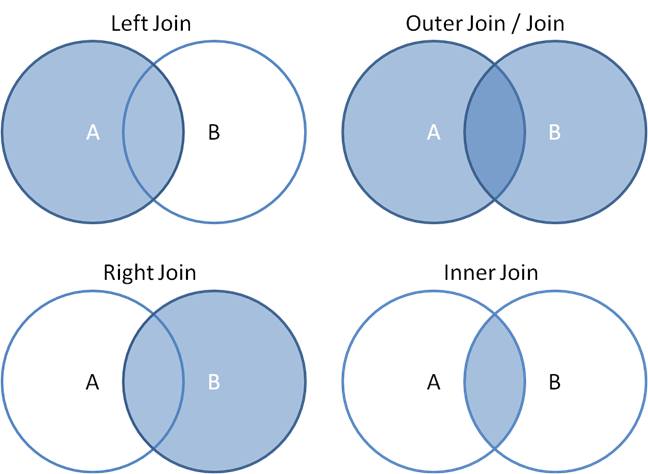


In [60]:
user_id

,Surname,Geography,Gender,Age,EstimatedSalary,target
CustomerId,,,,,,
15634602,Hargrave,France,f,42,101348.88,1
15647311,Hill,Spain,f,41,112542.58,0
15619304,Onio,France,f,42,113931.57,1
15701354,Boni,France,f,39,93826.63,1
15737888,Mitchell,Spain,f,43,79084.10,0
...,...,...,...,...,...,...
15606229,Obijiaku,France,m,39,96270.64,1
15569892,Johnstone,France,m,35,101699.77,1
15584532,Liu,France,f,36,42085.58,1


In [67]:
user_id.drop(index=user_id.sample(7).index, inplace=True)
user_id.shape

(9993, 6)

In [68]:
bank_id

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
CustomerId,,,,,,,
15634602,619,2,0.00,1,1,1,1
15647311,608,1,83807.86,1,0,1,0
15619304,502,8,159660.80,3,1,0,1
15701354,699,1,0.00,2,0,0,0
15737888,850,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...
15606229,771,5,0.00,2,1,0,0
15569892,516,10,57369.61,1,1,1,0
15584532,709,7,0.00,1,0,1,1


### left join

In [73]:
merge_left = bank_id.join(user_id, how='left')
merge_left.shape

(9895, 13)

In [74]:
merge_left.isna().sum()

CreditScore        0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
Surname            7
Geography          7
Gender             7
Age                7
EstimatedSalary    7
target             7
dtype: int64

### right join

In [75]:
merge_right = bank_id.join(user_id, how='right')
merge_right.shape

(9993, 13)

In [76]:
merge_right.isna().sum()

CreditScore        105
Tenure             105
Balance            105
NumOfProducts      105
HasCrCard          105
IsActiveMember     105
Exited             105
Surname              0
Geography            0
Gender               0
Age                  0
EstimatedSalary      0
target               0
dtype: int64

### inner join

In [77]:
merge_inner = bank_id.join(user_id, how='inner')
merge_inner.shape

(9888, 13)

In [78]:
merge_inner.isna().sum()

CreditScore        0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
Surname            0
Geography          0
Gender             0
Age                0
EstimatedSalary    0
target             0
dtype: int64

### outer join

In [81]:
merge_outer = bank_id.join(user_id, how='outer')
merge_outer.shape

(10000, 13)

In [82]:
merge_outer.isna().sum()

CreditScore        105
Tenure             105
Balance            105
NumOfProducts      105
HasCrCard          105
IsActiveMember     105
Exited             105
Surname              7
Geography            7
Gender               7
Age                  7
EstimatedSalary      7
target               7
dtype: int64

## Группировка

### group_by

In [83]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [92]:
group1 = pd.DataFrame(df.groupby('Geography')['Balance'])
group1

,0,1
0,France,0 0.00 2 159660.80 3 ...
1,Germany,7 115046.74 15 143129.41 16 13...
2,Spain,1 83807.86 4 125510.82 5 11...


In [99]:
group1.rename(columns={0: 'Country', 1: 'Balance'}, inplace=True)

In [100]:
group1

,Country,Balance
0,France,0 0.00 2 159660.80 3 ...
1,Germany,7 115046.74 15 143129.41 16 13...
2,Spain,1 83807.86 4 125510.82 5 11...


In [101]:
df.Balance.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Balance
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


In [128]:
group1a = (df.groupby('Geography'))
group1a.groups

{'France': [0, 2, 3, 6, 8, 9, 10, 12, 13, 19, 20, 23, 24, 25, 27, 29, 31, 35, 38, 41, 42, 43, 52, 55, 56, 59, 69, 71, 74, 75, 76, 77, 80, 81, 82, 83, 84, 87, 88, 91, 92, 93, 99, 100, 101, 102, 112, 117, 120, 122, 124, 125, 126, 128, 129, 130, 132, 133, 137, 141, 142, 144, 147, 148, 149, 151, 153, 154, 156, 158, 161, 162, 170, 173, 174, 176, 181, 183, 184, 185, 186, 190, 191, 192, 193, 195, 198, 199, 201, 203, 205, 207, 208, 209, 211, 212, 213, 216, 218, 219, ...], 'Germany': [7, 15, 16, 26, 28, 32, 39, 45, 46, 47, 48, 49, 50, 51, 53, 54, 57, 60, 61, 64, 65, 66, 67, 68, 70, 73, 79, 89, 97, 106, 107, 109, 110, 111, 114, 115, 116, 118, 119, 123, 127, 131, 134, 135, 136, 140, 159, 165, 166, 169, 171, 172, 177, 179, 182, 189, 197, 210, 214, 215, 224, 227, 228, 229, 233, 235, 237, 241, 243, 246, 248, 249, 250, 253, 257, 259, 260, 269, 271, 272, 274, 282, 290, 307, 309, 311, 313, 328, 329, 332, 333, 336, 339, 340, 346, 347, 348, 361, 363, 366, ...], 'Spain': [1, 4, 5, 11, 14, 17, 18, 21, 22, 

In [129]:
group1a.sum()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,,,
France,25196496,78672919670,3257437,193098,25093,3.113325e+08,7676,3543,2591,5.008945e+08,810
Germany,12545700,39367604133,1634497,99787,12570,3.004029e+08,3813,1791,1248,2.536936e+08,814
Spain,12262804,38868881891,1613354,96333,12465,1.531236e+08,3813,1721,1312,2.463143e+08,413


In [133]:
group1a.agg({'Balance': ['sum', 'min', 'max']}).style.format(precision=2, thousands=' ')

In [134]:
users.groupby('Geography').agg({'Age': ['mean'], 'EstimatedSalary': ['min']})

,Age,EstimatedSalary
,mean,min
Geography,,
France,38.511767,90.07
Germany,39.771622,11.58
Spain,38.890997,417.41


### pivot_table

In [135]:
df.pivot_table(index='Geography',
              aggfunc = {'Age': ['mean'], 'EstimatedSalary': ['min']})

,Age,EstimatedSalary
,mean,min
Geography,,
France,38.511767,90.07
Germany,39.771622,11.58
Spain,38.890997,417.41


In [141]:
df.pivot_table(index='Geography',
               columns='Gender',
               values='Balance',
               aggfunc = 'mean',
               margins = True,
               margins_name = 'Total'
              ).style.format(precision=2, thousands=' ')

Gender,Female,Male,Total
Geography,,,
France,60 322.67,63 546.28,62 092.64
Germany,119 145.97,120 259.67,119 730.12
Spain,59 862.09,63 352.83,61 818.15
Total,75 659.37,77 173.97,76 485.89


### crosstab
Параметры crosstab():
- index - значения для группировки по строкам
- columns - значения для группировки по столбцам
- values - агрегируемый столбец (или столбцы)
- aggfunc - функция, которая будет применена к каждой группе значений values, сгруппированным по значениям index и columns. Значения этой функции и есть значения сводной таблицы
- margins - добавляет результирующий столбец/строку
- normalize: boolean, {'all', 'index', 'columns'} - нормировка всей таблицы (или только по строкам/столбцам).


In [142]:
pd.crosstab(index=df.Geography,
           columns=df.Gender)

Gender,Female,Male
Geography,,
France,2261,2753
Germany,1193,1316
Spain,1089,1388


In [160]:
pd.crosstab(index=df.Geography,
           columns=df.Gender,
           normalize=True).multiply(100).style.format('{:.2f} %')

Gender,Female,Male
Geography,,
France,22.61 %,27.53 %
Germany,11.93 %,13.16 %
Spain,10.89 %,13.88 %


In [161]:
pd.crosstab(index = df.Geography,
           columns = df.Gender,
           values = df.Balance,
           aggfunc = 'mean'
           ).style.format(precision=2, thousands=' ')

Gender,Female,Male
Geography,,
France,60 322.67,63 546.28
Germany,119 145.97,120 259.67
Spain,59 862.09,63 352.83


## Встроенные визуализации

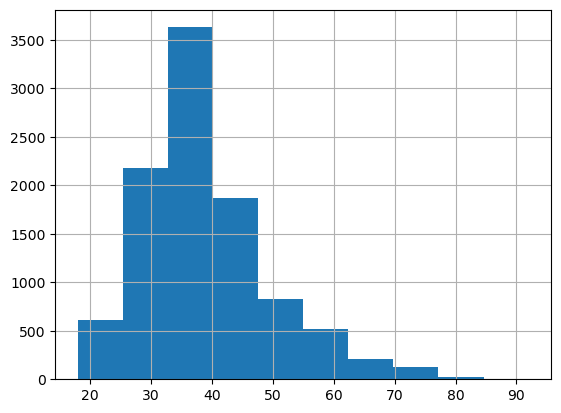

In [163]:
df.Age.hist();

In [171]:
data1 = df.groupby('Gender').count()['Age']
data1.name = 'by Gender'
data1

Gender
Female    4543
Male      5457
Name: by Gender, dtype: int64

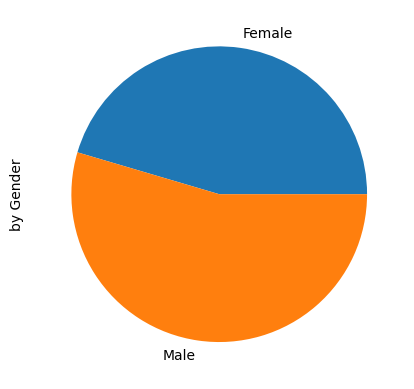

In [172]:
data1.plot.pie(y='Gender');

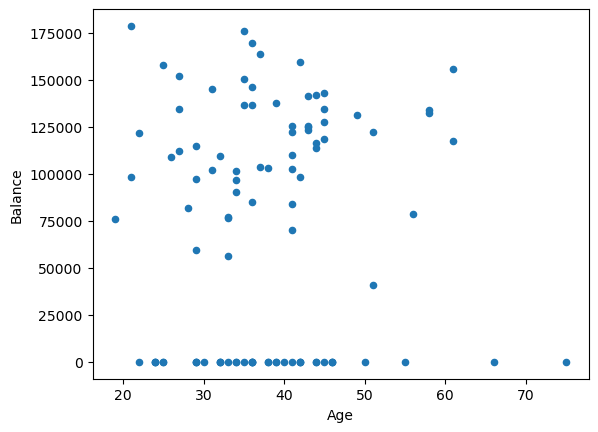

In [173]:
df.iloc[:100].plot.scatter(x='Age', y='Balance');

In [178]:
data2 = df.groupby('Tenure').count()['Balance']
data2.name = 'num_clients'
data2

Tenure
0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: num_clients, dtype: int64

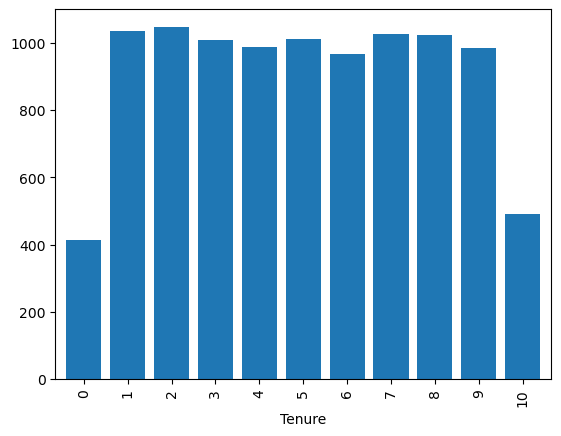

In [179]:
data2.plot.bar(width=0.8);